In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from utils import *

In [3]:
# Load the dataset
biomass_data = pd.read_csv('agb_AZ_final.csv')

In [3]:
biomass_data

,product,agb_Mg_ha,year,IGBP_Class,Longitude,Latitude,IGBP_Name,ffp_radius
0,chopping,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-118.502698,36.228055,Evergreen Needleleaf Forest,1
1,chopping,-9999.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-115.103417,35.283820,Evergreen Needleleaf Forest,1
2,chopping,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-117.900180,36.335968,Evergreen Needleleaf Forest,1
3,chopping,-9999.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-108.709532,33.620168,Evergreen Needleleaf Forest,1
4,chopping,0.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-112.648381,32.127377,Evergreen Needleleaf Forest,1
...,...,...,...,...,...,...,...,...
54005,xu,0.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-109.671763,34.744257,NaN,1
54006,xu,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-117.414568,35.787412,NaN,1
54007,xu,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-107.387590,33.907935,NaN,1
54008,xu,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-121.371403,39.546367,NaN,1


In [4]:
df=biomass_data
# 1. Create a unique identifier for each lat-long pair
df['location_id'] = df['Longitude'].astype(str) + '_' + df['Latitude'].astype(str)
df


,product,agb_Mg_ha,year,IGBP_Class,Longitude,Latitude,IGBP_Name,ffp_radius,location_id
0,chopping,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-118.502698,36.228055,Evergreen Needleleaf Forest,1,-118.5026978_36.22805529
1,chopping,-9999.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-115.103417,35.283820,Evergreen Needleleaf Forest,1,-115.1034173_35.28382012
2,chopping,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-117.900180,36.335968,Evergreen Needleleaf Forest,1,-117.9001799_36.33596788
3,chopping,-9999.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-108.709532,33.620168,Evergreen Needleleaf Forest,1,-108.7095324_33.62016768
4,chopping,0.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,1,-112.648381,32.127377,Evergreen Needleleaf Forest,1,-112.6483813_32.12737684
...,...,...,...,...,...,...,...,...,...
54005,xu,0.0,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-109.671763,34.744257,NaN,1,-109.6717626_34.74425716
54006,xu,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-117.414568,35.787412,NaN,1,-117.4145683_35.78741221
54007,xu,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-107.387590,33.907935,NaN,1,-107.3875899_33.90793458
54008,xu,NaN,Average_2010-2011-2012-2013-2014-2015-2016-201...,17,-121.371403,39.546367,NaN,1,-121.3714029_39.54636745


In [5]:
biomass_data = biomass_data.drop('year', axis=1)

In [6]:
biomass_data

,product,agb_Mg_ha,IGBP_Class,Longitude,Latitude,IGBP_Name,ffp_radius,location_id
0,chopping,NaN,1,-118.502698,36.228055,Evergreen Needleleaf Forest,1,-118.5026978_36.22805529
1,chopping,-9999.0,1,-115.103417,35.283820,Evergreen Needleleaf Forest,1,-115.1034173_35.28382012
2,chopping,NaN,1,-117.900180,36.335968,Evergreen Needleleaf Forest,1,-117.9001799_36.33596788
3,chopping,-9999.0,1,-108.709532,33.620168,Evergreen Needleleaf Forest,1,-108.7095324_33.62016768
4,chopping,0.0,1,-112.648381,32.127377,Evergreen Needleleaf Forest,1,-112.6483813_32.12737684
...,...,...,...,...,...,...,...,...
54005,xu,0.0,17,-109.671763,34.744257,NaN,1,-109.6717626_34.74425716
54006,xu,NaN,17,-117.414568,35.787412,NaN,1,-117.4145683_35.78741221
54007,xu,NaN,17,-107.387590,33.907935,NaN,1,-107.3875899_33.90793458
54008,xu,NaN,17,-121.371403,39.546367,NaN,1,-121.3714029_39.54636745


In [7]:
df=biomass_data
# Load the dataset (assuming it's in a CSV file named 'data.csv')
# df = pd.read_csv('data.csv')

# Get unique product categories
unique_products = df['product'].unique()

# Create a dictionary to store separate dataframes
product_dfs = {}

# Separate the dataframe for each unique product
for product in unique_products:
    product_dfs[product] = df[df['product'] == product].copy()
    
    # Reset index for each separated dataframe
    product_dfs[product].reset_index(drop=True, inplace=True)

In [8]:
ch=product_dfs['chopping']
ch = ch.drop('product', axis=1)
ch

,agb_Mg_ha,IGBP_Class,Longitude,Latitude,IGBP_Name,ffp_radius,location_id
0,NaN,1,-118.502698,36.228055,Evergreen Needleleaf Forest,1,-118.5026978_36.22805529
1,-9999.0,1,-115.103417,35.283820,Evergreen Needleleaf Forest,1,-115.1034173_35.28382012
2,NaN,1,-117.900180,36.335968,Evergreen Needleleaf Forest,1,-117.9001799_36.33596788
3,-9999.0,1,-108.709532,33.620168,Evergreen Needleleaf Forest,1,-108.7095324_33.62016768
4,0.0,1,-112.648381,32.127377,Evergreen Needleleaf Forest,1,-112.6483813_32.12737684
...,...,...,...,...,...,...,...
5396,0.0,17,-109.671763,34.744257,NaN,1,-109.6717626_34.74425716
5397,NaN,17,-117.414568,35.787412,NaN,1,-117.4145683_35.78741221
5398,NaN,17,-107.387590,33.907935,NaN,1,-107.3875899_33.90793458
5399,NaN,17,-121.371403,39.546367,NaN,1,-121.3714029_39.54636745


In [19]:
product_dfs['chopping']['agb_Mg_ha']


0          NaN
1      -9999.0
2          NaN
3      -9999.0
4          0.0
         ...  
5396       0.0
5397       NaN
5398       NaN
5399       NaN
5400       NaN
Name: agb_Mg_ha, Length: 5401, dtype: float64

In [61]:
# Create an empty dataframe to store the combined 'agb_MG_ha' columns
combined_df = pd.DataFrame()

# Append 'agb_MG_ha' column for each product category into the combined dataframe
for product in unique_products:
    # Extract the 'agb_MG_ha' column for the current product category
    product_agb = product_dfs[product]['agb_Mg_ha'].reset_index(drop=True)
    
    # Rename the column to indicate the product category
    product_agb.name = f'{product}'
    
    # Append the column to the combined dataframe
    combined_df = pd.concat([combined_df, product_agb], axis=1)

In [57]:
combined_df

,chopping,esa,gedi,gfw,harmonized,liu,ltgnn,menlove,natl,xu
0,NaN,NaN,NaN,NaN,445.0,NaN,NaN,NaN,NaN,NaN
1,-9999.0,-9999.000000,NaN,NaN,3.0,NaN,-9999.000000,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,-9999.0,-9999.000000,NaN,NaN,NaN,NaN,-9999.000000,NaN,NaN,NaN
4,0.0,3.227728,6.378667,NaN,NaN,9.633644,0.523012,0.000000,0.0,7.75922
...,...,...,...,...,...,...,...,...,...,...
5396,0.0,0.000000,0.352851,NaN,NaN,8.560379,0.000000,0.801399,0.0,0.00000
5397,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
5398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5399,NaN,NaN,NaN,NaN,780.0,NaN,NaN,NaN,NaN,NaN


In [40]:
full_df=pd.concat([combined_df,product_dfs['chopping']['Latitude']], axis=1)
full_df=pd.concat([combined_df,product_dfs['chopping']['Longitude']], axis=1)
full_df=pd.concat([combined_df,product_dfs['chopping']['IGBP_Name']], axis=1)
full_df=pd.concat([combined_df,product_dfs['chopping']['IGBP_Class']], axis=1)
full_df=pd.concat([combined_df,product_dfs['chopping']['ffp_radius']], axis=1)
full_df

,chopping,esa,gedi,gfw,harmonized,liu,ltgnn,menlove,natl,xu,ffp_radius
0,NaN,NaN,NaN,NaN,445.0,NaN,NaN,NaN,NaN,NaN,1
1,-9999.0,-9999.000000,NaN,NaN,3.0,NaN,-9999.000000,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1
3,-9999.0,-9999.000000,NaN,NaN,NaN,NaN,-9999.000000,NaN,NaN,NaN,1
4,0.0,3.227728,6.378667,NaN,NaN,9.633644,0.523012,0.000000,0.0,7.75922,1
...,...,...,...,...,...,...,...,...,...,...,...
5396,0.0,0.000000,0.352851,NaN,NaN,8.560379,0.000000,0.801399,0.0,0.00000,1
5397,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1
5398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5399,NaN,NaN,NaN,NaN,780.0,NaN,NaN,NaN,NaN,NaN,1


In [62]:
# Remove non-numeric rows
data_transposed_numeric = combined_df.select_dtypes(include=[np.number])

# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop rows with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
# Impute missing values with ROW mean (must use transposed df and axis=1 for rows)
data_imputed = data_transposed_numeric.T.fillna(data_transposed_numeric.mean(axis=1)).T

In [63]:
data_imputed

,chopping,esa,gedi,gfw,harmonized,liu,ltgnn,menlove,natl,xu
0,445.0,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.0,445.00000
1,-9999.0,-9999.000000,-7498.500000,-7498.500000,3.000000,-7498.500000,-9999.000000,-7498.500000,-7498.5,-7498.50000
2,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.00000
3,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.00000
4,0.0,3.227728,6.378667,3.440284,3.440284,9.633644,0.523012,0.000000,0.0,7.75922
...,...,...,...,...,...,...,...,...,...,...
5396,0.0,0.000000,0.352851,1.214329,1.214329,8.560379,0.000000,0.801399,0.0,0.00000
5397,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.00000
5398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5399,780.0,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0,780.00000


In [91]:
test=data_imputed.dropna(how='any')
test

,chopping,esa,gedi,gfw,harmonized,liu,ltgnn,menlove,natl,xu
0,445.0,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
1,-9999.0,-9999.000000,-7498.500000,-7498.500000,3.000000,-7498.500000,-9999.000000,-7498.500000,-7498.500000,-7498.500000
2,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
3,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
4,0.0,3.227728,6.378667,3.440284,3.440284,9.633644,0.523012,0.000000,0.000000,7.759220
...,...,...,...,...,...,...,...,...,...,...
5393,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
5395,19.0,26.000000,10.393441,29.645032,29.645032,23.127108,18.750000,8.280436,74.609993,56.999275
5396,0.0,0.000000,0.352851,1.214329,1.214329,8.560379,0.000000,0.801399,0.000000,0.000000
5397,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [92]:
data_transposed = test.T
data_transposed

,0,1,2,3,4,6,8,9,10,11,...,5387,5389,5390,5391,5392,5393,5395,5396,5397,5399
chopping,445.0,-9999.0,2.0,-9999.0,0.000000,10.909091,654.0,0.000000,0.000000,8.0,...,0.000000,-9999.00,987.0,39.0,-9999.0,7.0,19.000000,0.000000,4.0,780.0
esa,445.0,-9999.0,2.0,-9999.0,3.227728,0.000000,654.0,0.000000,0.600000,8.0,...,0.000000,-9999.00,987.0,39.0,-9999.0,7.0,26.000000,0.000000,4.0,780.0
gedi,445.0,-7498.5,2.0,-9999.0,6.378667,1.506807,654.0,1.462118,2.575745,8.0,...,7.972266,-7498.75,987.0,39.0,-9999.0,7.0,10.393441,0.352851,4.0,780.0
gfw,445.0,-7498.5,2.0,-9999.0,3.440284,16.497722,654.0,1.683489,2.829606,8.0,...,2.482773,-7498.75,987.0,39.0,-9999.0,7.0,29.645032,1.214329,4.0,780.0
harmonized,445.0,3.0,2.0,-9999.0,3.440284,16.497722,654.0,1.683489,2.829606,8.0,...,2.482773,2.00,987.0,39.0,-9999.0,7.0,29.645032,1.214329,4.0,780.0
liu,445.0,-7498.5,2.0,-9999.0,9.633644,10.597534,654.0,9.854346,8.008692,8.0,...,9.032247,-7498.75,987.0,39.0,-9999.0,7.0,23.127108,8.560379,4.0,780.0
ltgnn,445.0,-9999.0,2.0,-9999.0,0.523012,0.250000,654.0,0.000000,10.915918,8.0,...,0.000000,-9999.00,987.0,39.0,-9999.0,7.0,18.750000,0.000000,4.0,780.0
menlove,445.0,-7498.5,2.0,-9999.0,0.000000,0.000000,654.0,2.151451,0.000000,8.0,...,0.431019,-7498.75,987.0,39.0,-9999.0,7.0,8.280436,0.801399,4.0,780.0
natl,445.0,-7498.5,2.0,-9999.0,0.000000,40.949997,654.0,0.000000,0.000000,8.0,...,0.000000,-7498.75,987.0,39.0,-9999.0,7.0,74.609993,0.000000,4.0,780.0
xu,445.0,-7498.5,2.0,-9999.0,7.759220,67.768349,654.0,0.000000,0.536493,8.0,...,2.426653,-7498.75,987.0,39.0,-9999.0,7.0,56.999275,0.000000,4.0,780.0


In [93]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_transposed)

#hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = cluster.fit_predict(data_scaled)

# # kmeans clustering
# cluster = KMeans(n_clusters=5)
# clusters = cluster.fit_predict(data_scaled)

# DBSCAN clustering
# dbscan = DBSCAN(eps=0.3, min_samples=4)  # Adjust the parameters as needed
# clusters = dbscan.fit_predict(data_scaled)

In [94]:
# Add cluster labels to the transposed DataFrame, for 1)
data_transposed.loc[:,'cluster'] = clusters

# Transpose the data back to the original format
biomass_data_clustered = data_transposed.reset_index()
biomass_data_clustered

,index,0,1,2,3,4,6,8,9,10,...,5389,5390,5391,5392,5393,5395,5396,5397,5399,cluster
0,chopping,445.0,-9999.0,2.0,-9999.0,0.000000,10.909091,654.0,0.000000,0.000000,...,-9999.00,987.0,39.0,-9999.0,7.0,19.000000,0.000000,4.0,780.0,1
1,esa,445.0,-9999.0,2.0,-9999.0,3.227728,0.000000,654.0,0.000000,0.600000,...,-9999.00,987.0,39.0,-9999.0,7.0,26.000000,0.000000,4.0,780.0,1
2,gedi,445.0,-7498.5,2.0,-9999.0,6.378667,1.506807,654.0,1.462118,2.575745,...,-7498.75,987.0,39.0,-9999.0,7.0,10.393441,0.352851,4.0,780.0,1
3,gfw,445.0,-7498.5,2.0,-9999.0,3.440284,16.497722,654.0,1.683489,2.829606,...,-7498.75,987.0,39.0,-9999.0,7.0,29.645032,1.214329,4.0,780.0,1
4,harmonized,445.0,3.0,2.0,-9999.0,3.440284,16.497722,654.0,1.683489,2.829606,...,2.00,987.0,39.0,-9999.0,7.0,29.645032,1.214329,4.0,780.0,1
5,liu,445.0,-7498.5,2.0,-9999.0,9.633644,10.597534,654.0,9.854346,8.008692,...,-7498.75,987.0,39.0,-9999.0,7.0,23.127108,8.560379,4.0,780.0,0
6,ltgnn,445.0,-9999.0,2.0,-9999.0,0.523012,0.250000,654.0,0.000000,10.915918,...,-9999.00,987.0,39.0,-9999.0,7.0,18.750000,0.000000,4.0,780.0,1
7,menlove,445.0,-7498.5,2.0,-9999.0,0.000000,0.000000,654.0,2.151451,0.000000,...,-7498.75,987.0,39.0,-9999.0,7.0,8.280436,0.801399,4.0,780.0,1
8,natl,445.0,-7498.5,2.0,-9999.0,0.000000,40.949997,654.0,0.000000,0.000000,...,-7498.75,987.0,39.0,-9999.0,7.0,74.609993,0.000000,4.0,780.0,2
9,xu,445.0,-7498.5,2.0,-9999.0,7.759220,67.768349,654.0,0.000000,0.536493,...,-7498.75,987.0,39.0,-9999.0,7.0,56.999275,0.000000,4.0,780.0,0


biomass_data_clustered has more columns than rows, clustering occured on products
Cluster 1 contains multiple products, plotting heatmap...
Cluster 0 contains multiple products, plotting heatmap...


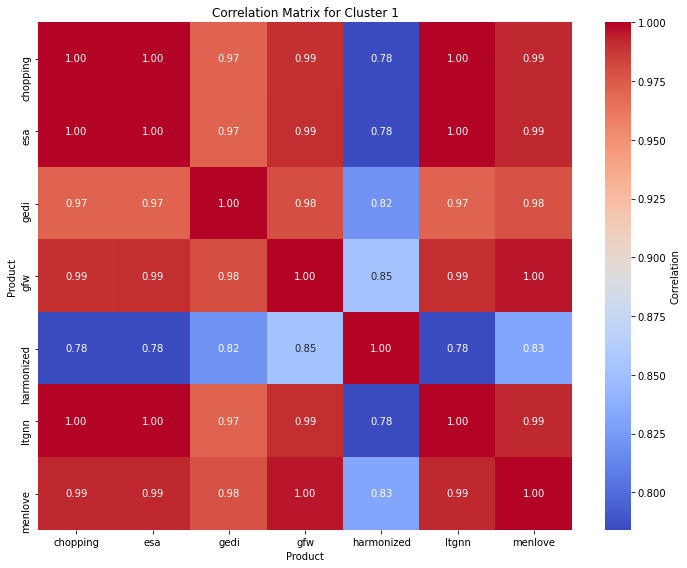

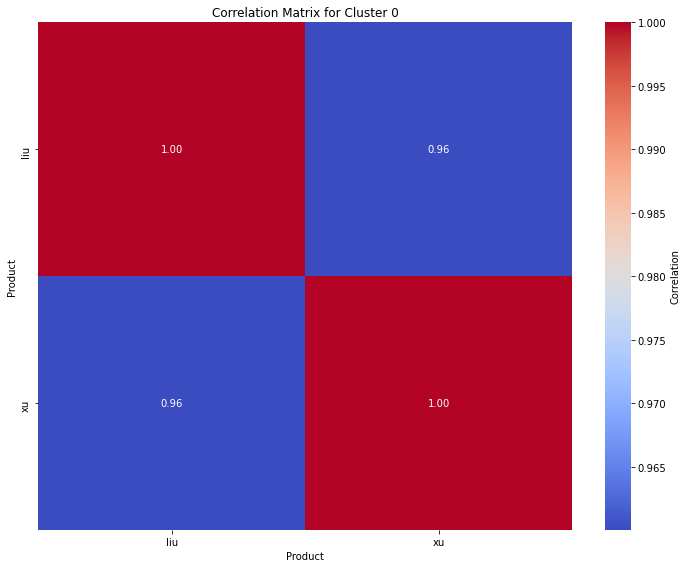

In [95]:
# List of products
products = ['chopping', 'esa', 'gedi', 'gfw', 'harmonized', 'liu', 'ltgnn','menlove','natl','xu']

corr_matrix=plot_heat_by_clus(biomass_data_clustered,products)